> - # Feature Selection

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/mobile_dataset.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


> - Is there is Duplicate ELements ?

In [4]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

> - Depandent Feature and Indepandent Feature

In [5]:
X = df.iloc[:, :-1]
y = df.price_range

In [6]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


> - Selecting best features

In [10]:
from sklearn.feature_selection import SelectKBest, chi2

In [11]:
Orderd_feature = SelectKBest(score_func = chi2, k = 20)
Features_rank = Orderd_feature.fit(X, y)

In [14]:
Orderd_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

> - **Making Two Data Frame for Score and Columns**

In [16]:
dfscores = pd.DataFrame(Orderd_feature.scores_,columns=["Score"])
dfcolumns = pd.DataFrame(X.columns)

> - Concating above two fataframe

In [17]:
features_rank = pd.concat([dfcolumns,dfscores],axis=1)

> - Changing name of columns 

In [19]:
features_rank.columns=['Features','Score']
features_rank.head()

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166


> - These are top 10 important feature

In [20]:
features_rank.nlargest(10, 'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


> - ## **Feature Importance**

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [22]:
print(model.feature_importances_)

[0.06121053 0.01972858 0.03320251 0.01974223 0.03219693 0.01715816
 0.03371813 0.03269931 0.03620989 0.03308023 0.03320469 0.04709104
 0.04926984 0.39610364 0.03278021 0.03440774 0.03437964 0.01478422
 0.01890291 0.02012959]


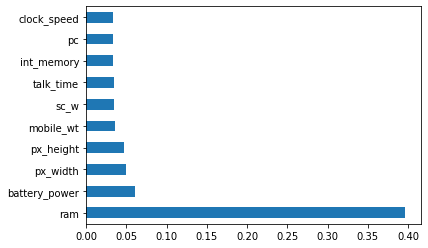

In [29]:
Features = pd.Series(model.feature_importances_, index = X.columns)
Features.nlargest(10).plot(kind = 'barh')
plt.show()

> - ## **Correlation**

<AxesSubplot:>

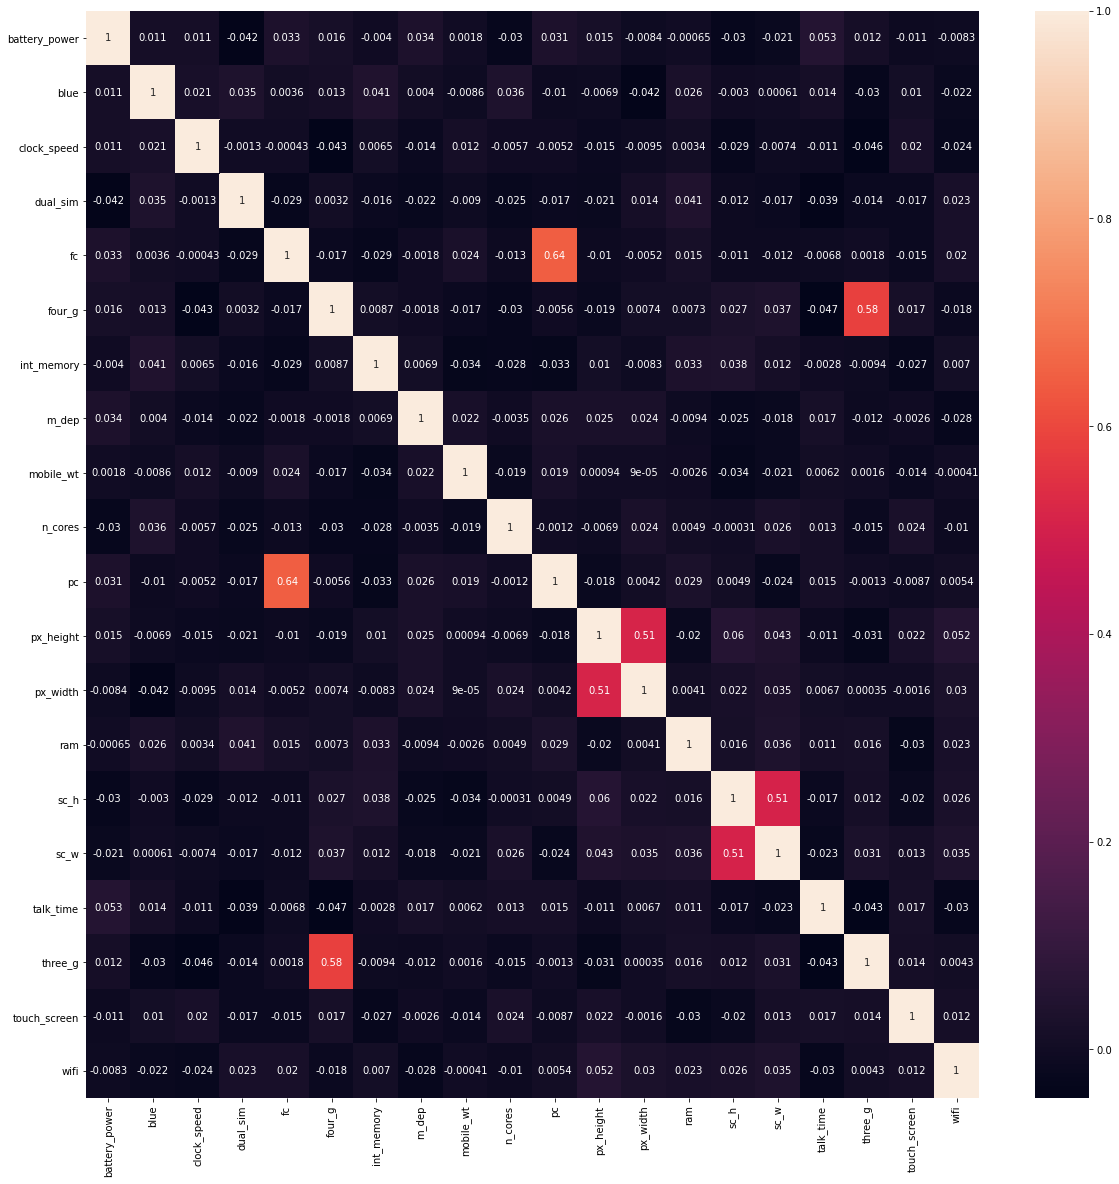

In [32]:
import seaborn as sns
corr = df.iloc[:, :-1].corr() # Depandent feature is not taken
Top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[Top_features].corr(), annot=True)

In [33]:
threshold = 0.5

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

> - Highly Correlated features

In [34]:
correlation(df.iloc[:,:-1],threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

>  - Information Gain /
> Delete top 10 features

In [35]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.847655
battery_power    0.030672
px_width         0.030372
m_dep            0.024520
sc_w             0.020440
px_height        0.019757
mobile_wt        0.012083
dual_sim         0.010299
four_g           0.007898
sc_h             0.004878
blue             0.002593
fc               0.000138
clock_speed      0.000000
wifi             0.000000
int_memory       0.000000
touch_screen     0.000000
pc               0.000000
talk_time        0.000000
three_g          0.000000
n_cores          0.000000
dtype: float64